In [527]:
import pandas as pd
import json
import numpy as np
import collections
import random

In [528]:
training_data = pd.read_pickle('./data/train_reviews.pkl')
test_data = pd.read_pickle('./data/test_reviews.pkl')
businesses = pd.read_pickle('./data/businesses.pkl')

display(training_data)
display(test_data)
display(businesses)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,qx6WhZ42eDKmBchZDax4dQ,0,2017-03-27 01:14:37,0,Amo5gZBvCuPc_tZNpHwtsA,5.0,"Our family LOVES the food here. Quick, friendl...",1,DzZ7piLBF-WsJxqosfJgtA
2,1XOty79t4o_e3v0OOw8LTA,2,2017-07-28 17:55:02,0,JTvVNbqHbdLq3zeuxtjoug,5.0,We have had a wonderful experience with Dr. Be...,2,qOiMHf9eBZhsvDSqauIiug
4,9Q1ZtzTPFWG4fJiFSko5Xg,0,2016-05-31 05:00:31,0,TetO8IIvbaaX9xnC7ZE1Rw,5.0,My boyfriend and I went here for dinner evenin...,0,CBYlr6bksWM1WA_pTumeeg
6,ipFobdM6X_4SNMA9ZBfdAQ,0,2013-10-24 02:49:09,0,e2YdyDmFaps6frh6kWRABw,4.0,Pita jungle is one of our family's favorite pl...,0,X61CbjwRDWWPRkN61PIpyA
8,ipFobdM6X_4SNMA9ZBfdAQ,1,2014-01-17 03:39:20,1,-x2NjuDTiphKwCixSrv_SQ,4.0,I've eaten at this location twice. The first t...,1,NgavU49JWmusG2BjfqNdaw
...,...,...,...,...,...,...,...,...,...
129206,d7ozMWbBwcFOkHM3zmktfA,0,2013-08-11 23:57:36,0,-fGDKpQm-k6XX3vOzX7fAw,4.0,This place is great to satisfy a quick sushi c...,0,Jx8_Rp_AlZ1TqiYQqdtIaA
129208,PebX-Sf_h4FJGgsRAA5Fng,0,2015-07-27 06:46:36,0,pI6mQmn49cCyZZakIKqLaw,5.0,I've been coming to this mom and pop restauran...,0,6VsdbWaPOkzQJ0svgUtkfQ
129209,jJDnxINrCKstFyeH3F8Cfw,0,2013-02-23 22:10:32,0,yllqhlHLN2G9yXbhLzxRpw,1.0,I was shocked and truly hurt today by Earnhard...,1,eYDWWuWYbPYWVI-gR5WHBw
129210,e6d50rwRTU-fONeSBJmOHQ,0,2018-10-30 21:30:45,0,V3eXEfo--DPg0fDqRH5bGg,5.0,Parking is available in front but can be busy ...,0,4tm7Y6z3fnmmEbb_LThfYg


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
1,Z1wApYkrMmMQinjDdbSLbg,0,2015-10-07 22:45:03,0,QMVMeS2sAGCLTWlkyHIaDg,1.0,Place took forever... Come to find out that th...,0,k9lY8q4dvX8BwCE2n4PpBA
3,7tdVsSDXRKtLLC-fD1hJ-A,0,2012-12-04 02:18:24,0,Vo2hMjZGM1-LYSBSgABTZA,4.0,I have visited this place several times. They ...,0,W0QVEiIElFQ9ulVrMp9_nA
7,5GwFUNl6nsDsMuv435G1Eg,0,2017-01-14 21:51:16,0,1kSCzKEoNmhWIX5FP5XsEA,5.0,I was in Mesa for the morning and found this g...,0,ETWISuSphgjc3puFAplnJg
18,7tdVsSDXRKtLLC-fD1hJ-A,0,2014-08-24 19:47:26,0,mbXh-XhAI17ZfghkeeDnLw,4.0,Yum! Wasn't expecting this to be as good or as...,0,6EGqHVa7QAVOSx5ufxtzHA
32,ZRHSidI7IIeXhTHMc9L_gw,0,2018-02-23 22:10:22,0,y8lY89amJsOW9m_iXKQfgQ,2.0,"I ordered a Thai salad, fruit tart, and a cinn...",0,VF7jQT9efeFOU38BWqpQ6Q
...,...,...,...,...,...,...,...,...,...
129194,N5mU4iB5jCy7B4re_i2jIQ,0,2018-07-22 22:17:35,0,2yIZMeZgIvkxmDYzZBrj1Q,1.0,This store was no help to all 4 Apple devices ...,0,F_d3CsPwcE964tBdHaSaNg
129197,iNkdV6ggGJFa3lYU3fKuqw,0,2018-04-27 03:00:51,0,jRMHVh5lOcf4Pl1toLbs4g,2.0,I have used them a number of times. They neve...,0,HKao-hyqqkEu6o4rm2Q3Zw
129202,A9hmWmvIIscQKHc3pKb3VA,0,2012-12-08 20:09:04,0,whjTtd5X67C5bDKd_DKG5Q,5.0,Great location! The girls immediately greet yo...,0,oq9Srm2cM93hcED_CMDlPQ
129204,v0zWuMRsK-e8hsY5VOvdog,0,2018-10-22 02:07:09,0,-NR_24GLMQ57klONySZeDw,3.0,Just want everyone to know don't waste your ti...,0,eUUMw_QfC-ieeqfKVf6UcQ


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,"560 E Germann Rd, Ste 107",{'BusinessAcceptsCreditCards': 'True'},hgPhZoB3zdiRdlT9FETskw,"Auto Glass Services, Auto Detailing, Automotiv...",Gilbert,"{'Monday': '0:0-0:0', 'Tuesday': '7:0-18:0', '...",1,33.278251,-111.777460,OzBraz,85297,12,5.0,AZ
1,709 W Ray Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",GWO87Y-IqL54_Ijx6hTYAQ,"Food, Desserts, Juice Bars & Smoothies, Ice Cr...",Gilbert,"{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...",0,33.320386,-111.804652,Bruster's Real Ice Cream,85233,57,4.5,AZ
2,"4024 E Guadalupe Rd, Ste 101","{'BusinessAcceptsCreditCards': 'True', 'Restau...",KiE81YHZCEdPPlmrXghgzA,"Beauty & Spas, Nail Salons",Gilbert,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ...",1,33.365437,-111.704174,Sun Valley Nail and Spa,85234,34,3.5,AZ
5,"2680 S Val Vista Dr. Ste 135, Bldg 7 Ste 135","{'AcceptsInsurance': 'True', 'BusinessAcceptsC...",SVhM3Pxjw-PUPr1sBghqlw,"Diagnostic Services, Diagnostic Imaging, Radio...",Gilbert,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.302772,-111.756137,SimonMed Imaging - Gilbert Spectrum,85295,93,2.0,AZ
6,"2487 S Gilbert Rd, Ste 102","{'GoodForKids': 'True', 'BusinessAcceptsCredit...",cmsAFAymfVoBitSF8R6GKw,"Chinese, Restaurants",Gilbert,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,33.304830,-111.788866,Yao Fine Chinese Cuisine,85295,200,4.0,AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,1720 W Elliot Rd,{'BusinessAcceptsCreditCards': 'True'},LPCAjcX8GOlCDsHMZdsPvg,"Car Stereo Installation, Automotive",Gilbert,"{'Tuesday': '9:0-17:0', 'Wednesday': '9:0-17:0...",1,33.350399,-111.827142,Unique Car Audio,85233,31,4.5,AZ
3457,865 N Gilbert Rd,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",wHn5jKZc3lt_Cu8uoBblgw,"Massage Therapy, Massage, Skin Care, Health & ...",Gilbert,"{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",1,33.366130,-111.789217,Massage Envy - Gilbert,85234,75,3.5,AZ
3458,3885 S Gilbert Rd,"{'BusinessParking': '{'garage': False, 'street...",Mx3atpdnV-cJDcJoZBSjxQ,"Shopping, Fashion, Women's Clothing, Accessories",Gilbert,None,1,33.279534,-111.786107,Tilly's,85296,14,2.5,AZ
3463,"366 N Gilbert Rd, Ste 106","{'WheelchairAccessible': 'True', 'WiFi': 'u'fr...",_r-OvLO5wqncmsBCg3i0qw,"Restaurants, Italian, Pizza",Gilbert,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",1,33.356542,-111.790019,Pomo Pizzeria Gilbert,85234,337,4.0,AZ


In [532]:
# een utility matrix creëeren van de trainingsdata set
def pivot_stars(reviews):
    matrix = reviews.pivot_table(index='business_id', columns='user_id', values='stars')
    return matrix

utility_matrix = pivot_stars(training_data)
display(utility_matrix.head())

user_id,--2HUmLkcNHZp0xw6AMBPg,--3WaS23LcIXtxyFULJHTA,--MOaYz3TyMKVSVoR0cW_w,--Rm-VyYWgHA7ZpljAMlvg,--unw0LLleszob8UnoMVrw,--vrYCvpozoPQ14yNh3ogA,--xUSSxDXPEaE9BGZKtVDQ,-01CztZ8o5UbarmEiQLDsQ,-03VewnKHQJAoxqTqjhDkA,-056p1z8OpIrGon4bgEKNg,...,zz7TmdlPu_rbfunhfSV9OA,zzF17hwmlFTuOa1Yagi-eg,zzO9aMo33jA3pPv8SoYskw,zzOxlK5lm7jlulotNoYd4g,zzRq3Ykz8yfr2mcsPhYnEg,zzWlTfNssZPlQo4_cKujGw,zzY9daJLRVCbcm79qiZqug,zzeO-4J8u1gZS4Vg_J8jyg,zzjQuRnY_Kgr_zaw6A-ACQ,zzkTUnua51enVp7OrWBwNg
business_id,,,,,,,,,,,,,,,,,,,,,
--FLdgM0GNpXVMn74ppCGw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2wfiUn6AZm2KO0FJYakVQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-461KOozus5M0Px02uyRgg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-4bpDsuRmpjWjxrtdYfJQA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-6O_cneh21YEljiDhVX78g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [533]:
#content based filtering: op basis van catogories of attributes

# alles hercategorieseren tweede manier
horeca = ['Soul Food', 'Bistros', 'Pita', 'Afghan', 'Wineries', 'Coffee Roasteries', 'Ice Delivery', 'French', 'Cuban', 'Ethnic Food', 'Tapas/Small Plates', 'Pakistani', 'Acai Bowls', 'Salad',  'Fast Food', 'American (New)', 'Specialty Food', 'Pizza', 'Cheesesteaks', 'Shaved Ice', 'Burgers', 'Restaurants', 'Breakfast & Brunch',
              'Sushi Bars', 'Chicken Wings', 'Italian', 'Local Flavor', 'Beer', 'Ice Cream & Frozen Yogurt', 'Hot Dogs', 'Food Delivery Services', 'Bakeries',
              'Soup', 'Desserts', 'Seafood', 'Mexican', 'Veterinarians', 'Mediterranean', 'Japanese', 'Comfort Food', 'Bagels','Asian Fusion', 'Chicken Shop',
              'Sandwiches', 'Steakhouses', 'American (Traditional)','Chinese', 'Donuts',  'Diners', 'Herbs & Spices', 'Tex-Mex', 'Olive Oil', 'Thai',
       ]
drinks_bars = ['Cigar Bars', 'Brewpubs', 'Sports Bars', 'Pubs', 'Juice Bars & Smoothies', 'Cafes', 'Tea Rooms', 'Bars', 'Cocktail Bars', 'Coffee & Tea', 'Wine Bars']
sport = ['Golf Lessons', 'Horseback Riding', 'Circuit Training Gyms', 'Active Life', 'Kickboxing', 'Bubble Soccer', 'Soccer', 'Swimming Lessons/Schools', 'Golf', 'Yoga', 'Hiking', 'Dance Schools', 'Gyms', 'Fitness & Instruction', 'Sporting Goods', 'Mini Golf', 'Trainers', 'Active Life', 'Sports Clubs', 'Cycling Classes', 'Dance Studios']
stores = ['Hunting & Fishing Supplies', 'Paint Stores', 'Bikes', 'Bike Shop', 'Baby Gear & Furniture', 'Flea Markets', 'Plus Size Fashion', 'Watches', 'Hockey Equipment','Outlet Stores', 'Piano Stores', 'Swimwear', 'Security Systems', 'Water Stores', 'Brewing Supplies', 'Video Game Stores', 'Fabric Stores', 'Food', 'Electronics', 'Discount Store', 'Farming Equipment', 'Pet Stores', 'Body Shops', 'Arts & Crafts', 'Hobby Shops', 'Furniture Stores',
         'Books', 'Computers', 'Home Decor', 'Mags', 'Toy Stores', "Children's Clothing", 'Interior Design', 'Battery Stores',
         'Art Supplies', 'Building Supplies', 'Jewelry', 'Fashion', 'Convenience Stores', 'Bookstores', 'Knitting Supplies', 'Vintage & Consignment',
         'Bridal', 'Office Equipment', "Men's Clothing", 'Maternity Wear', 'Mobile Phones', 'Used', "Women's Clothing", 'Shopping', 'Shopping Centers',
         'Gift Shops', 'Grocery', 'Used Bookstore', 'Delis', 'Home & Garden', 'Flowers & Gifts', 'Baby Gear & Furniture', 'Bikes', 'Florists', 'Dry Cleaning & Laundry',
         'Hot Tub & Pool', 'Department Stores', 'Appliances', 'Shades & Blinds', 'Pasta Shops', 'Heating & Air Conditioning/HVAC', 'Appliances & Repair', 'Kitchen & Bath', 'Shoe Stores',]
beauty = ['Tanning', 'Plastic Surgeons', 'Laser Hair Removal', 'Spray Tanning', 'Kids Hair Salons', 'Acne Treatment', "Men's Hair Salons", 'Teeth Whitening', 'Henna Artists', 'Waxing', 'Endodontists', 'Barbers', 'Eyelash Service', 'Nail Salons', 'Day Spas', 'Massage', 'Laser Hair Removal', 'Tattoo', 'Laser Eye Surgery/Lasik',
         'Tanning', 'Hair Stylists', 'Cosmetics & Beauty Supply', 'Beauty & Spas', 'Massage Therapy', 'Skin Care', "Men's Hair Salons", 'Makeup Artists', 'Hair Removal', 'Hair Salons',]
entertainment = ['Indoor Playcentre', 'Kids Activities', 'Libraries', 'Arcades', 'Clowns', 'Summer Camps', 'Escape Games', 'Amusement Parks',  'Playgrounds', 'Adult Entertainment', 'Paint-Your-Own Pottery', 'Performing Arts', 'Pumpkin Patches', 'Parks', 'Nightlife', 'Arts & Entertainment', 'Music & Video',
                'Paint & Sip', 'Wine & Spirits', 'Country Clubs']
auto = ['Departments of Motor Vehicles', 'Driving Schools', 'Used Car Dealers', 'Motorcycle Gear','Auto Parts & Supplies', 'RV Dealers', 'Motorcycle Repair', 'Vehicle Wraps', 'Auto Insurance', 'Automotive', 'Auto Detailing', 'Auto Repair', 'Auto Parts & Supplies', 'Car Dealers', 'Car Rental', 'Car Wash', 'Tires', 'Towing', 'Oil Change Stations', 'Gas Stations',]
school = ['Tutoring Centers', 'Montessori Schools', 'Education', 'Specialty Schools', 'Education', 'Test Preparation', 'Elementary Schools',]
health = ['Pharmacy', 'Health Markets', 'Home Health Care', 'Sports Medicine', 'Hearing Aid Providers', 'Preventive Medicine', 'Traditional Chinese Medicine', 'Obstetricians & Gynecologists', 'Urgent Care', 'Nutritionists', 'Hospitals', 'Reflexology', 'Drugstores', 'Health & Medical', 'Acupuncture', 'Osteopathic Physicians', 'Orthopedists', 'Endocrinologists', 'Dentists', 'General Dentistry', 
         'Periodontists', 'Medical Centers', 'Doctors', 'Orthodontists', 'Physical Therapy', 'Chiropractors', 'Diagnostic Services', 'Contractors', 'Medical Spas',]
pets = ['Pet Cremation Services', 'Pet Sitting', 'Pets', 'Pet Groomers', 'Pet Training', 'Pet Services', 'Animal Shelters',]
eye_service = ['Sunglasses', 'Optometrists', 'Eyewear & Opticians',]
services = ['Septic Services', 'Windows Installation', 'Roof Inspectors', 'Television Service Providers', 'Shoe Repair', 'Musical Instrument Services', 'Transmission Repair', 'Photography Stores & Services', 'Family Practice', 'Interior Design', 'Countertop Installation', 'University Housing', 'Event Photography', 'Keys & Locksmiths', 'Mobile Phone Repair', 'Solar Installation', 'IV Hydration', 'Garage Door Services', 'Life Coach', 'Home Window Tinting', 'Water Heater Installation/Repair', 'Packing Services' 'Commercial Truck Repair', 'Water Purification Services', 'Street Vendors',  'Electricians', 'Landscaping', 'Home Inspectors', 'Decks & Railing', 'Pest Control', 'Tree Services', 'Plumbing', 'Roofing', 'IT Services & Computer Repair', 'Home Services', 'Gardeners', 'Movers', 'Laundry Services',
                'Lighting Fixtures & Equipment', 'Siding', 'Lawn Services', 'Snow Removal', 'Handyman', 'Laundry Services', 'Nurseries & Gardening''Trailer Repair', 'Community Service/Non-Profit', 'Internet Service Providers', 'Real Estate Services', 'Printing Services', 'Financial Services',
                   'Event Planning & Services', 'Pool & Hot Tub Service', 'Professional Services', 'Local Services', 'Photography Stores & Services', 'Farm Equipment Repair',]
religious = ['Churches', 'Religious Organizations',]
financial = ['Investing', 'Banks & Credit Unions', 'Notaries',]
residence = ['Bed & Breakfast', 'Apartments', 'Hotels & Travel', 'Retirement Homes',]

data3 = []
data4 = []
for row in businesses.itertuples():
    categories = row.categories
    categories = categories.split(", ")
    for categorie in categories:
        data3.append(row.business_id)
        if categorie in horeca:
            data4.append('horeca')
        elif categorie in drinks_bars:
            data4.append('drinks_bars')
        elif categorie in sport:
            data4.append('sport')
        elif categorie in stores:
            data4.append('stores')
        elif categorie in beauty:
            data4.append('beauty')
        elif categorie in entertainment:
            data4.append('entertainment')
        elif categorie in auto:
            data4.append('auto')
        elif categorie in school:
            data4.append('school')
        elif categorie in services:
            data4.append('services')
        elif categorie in health:
            data4.append('health')
        elif categorie in pets:
            data4.append('pets')
        elif categorie in eye_service:
            data4.append('eye_service')
        elif categorie in religious:
            data4.append('religious')
        elif categorie in financial:
            data4.append('financial')
        elif categorie in residence:
            data4.append('residence')
        else:
            data4.append('other')
list1=[]                 
for row in businesses.itertuples():
    categories = row.categories
    for categorie in categories.split(", "):
        list1.append(categorie)   
    
df_categories_categorized = pd.DataFrame(list(zip(data3, data4)), columns = ['business_id', 'categorie'])

#orginele manier
data1 = []
data2 = []
for row in businesses.itertuples():
    categories = row.categories
    categories = categories.split(", ")
    for categorie in categories:
        data1.append(row.business_id)
        data2.append(categorie)
        
df_categories = pd.DataFrame(list(zip(data1, data2)), columns = ['business_id', 'categorie'])
    
display(df_categories)
display(df_categories_categorized)

,business_id,categorie
0,hgPhZoB3zdiRdlT9FETskw,Auto Glass Services
1,hgPhZoB3zdiRdlT9FETskw,Auto Detailing
2,hgPhZoB3zdiRdlT9FETskw,Automotive
3,hgPhZoB3zdiRdlT9FETskw,Auto Parts & Supplies
4,hgPhZoB3zdiRdlT9FETskw,Auto Customization
...,...,...
8272,ABjONdA5Fw8XBOM65tmW4w,Plumbing
8273,ABjONdA5Fw8XBOM65tmW4w,Water Heater Installation/Repair
8274,ABjONdA5Fw8XBOM65tmW4w,Professional Services
8275,ABjONdA5Fw8XBOM65tmW4w,Home Services


,business_id,categorie
0,hgPhZoB3zdiRdlT9FETskw,other
1,hgPhZoB3zdiRdlT9FETskw,auto
2,hgPhZoB3zdiRdlT9FETskw,auto
3,hgPhZoB3zdiRdlT9FETskw,auto
4,hgPhZoB3zdiRdlT9FETskw,other
...,...,...
8272,ABjONdA5Fw8XBOM65tmW4w,services
8273,ABjONdA5Fw8XBOM65tmW4w,services
8274,ABjONdA5Fw8XBOM65tmW4w,services
8275,ABjONdA5Fw8XBOM65tmW4w,services


In [534]:
# maak utility matrix op basis van de nieuwe categorieën
def pivot_categories(df):
    return df.pivot_table(index = 'business_id', columns = 'categorie', aggfunc = 'size', fill_value=0)

df_utility_categories = pivot_categories(df_categories_categorized)

for business in df_utility_categories.index:
    for categorie in df_utility_categories.columns:
        value = df_utility_categories.loc[business, categorie]
        if value > 0:
            df_utility_categories.loc[business, categorie] = 1
            
display(df_utility_categories.head())

categorie,auto,beauty,drinks_bars,entertainment,eye_service,financial,health,horeca,other,pets,religious,residence,school,services,sport,stores
business_id,,,,,,,,,,,,,,,,
--FLdgM0GNpXVMn74ppCGw,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
-2wfiUn6AZm2KO0FJYakVQ,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-461KOozus5M0Px02uyRgg,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
-4bpDsuRmpjWjxrtdYfJQA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
-6O_cneh21YEljiDhVX78g,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [535]:
# maak similarity mayrix op basis van de jaccard similarity
def create_similarity_matrix_jaccard(matrix):
    m11 = matrix @ matrix.T
    m10 = pd.DataFrame(matrix.sum(axis = 1).values + np.zeros(m11.shape), index = m11.index, columns = m11.index)
    m01 = m10.T
    return m11/(m01 + m10 - m11)

df_similarity_categories = create_similarity_matrix_jaccard(df_utility_categories)
display(df_similarity_categories.head())

business_id,--FLdgM0GNpXVMn74ppCGw,-2wfiUn6AZm2KO0FJYakVQ,-461KOozus5M0Px02uyRgg,-4bpDsuRmpjWjxrtdYfJQA,-6O_cneh21YEljiDhVX78g,-6tvduBzjLI1ISfs3F_qTg,-8wrG6WiLkSRS1JgE7jD0Q,-AliE9BXGQl8pIrdlpCOxQ,-I1-KL5RkUcDM3JbYPI_1g,-JzL9Xkx42k82uKSy3X5Zw,...,ze3AgRdWZmneIdpZDmxJuA,zgPrDvk5x0FZj4Wbzb8R6w,zhVrl8N_zMW8f9NuoluG6Q,zniY0Pd9BTUwoFuejSMPBg,zpLOsO7DuxcwwhmHtiASWg,zu1JllEH2cjH6uijHIB6TQ,zvhS7uG_206nRE2ufmmLPQ,zwvshlu1bE2na9sXYrP0TQ,zx0SIkaS1RkqzPFmbUBeFA,zxHN6Rx5MUlVO-qpyuAcLw
business_id,,,,,,,,,,,,,,,,,,,,,
--FLdgM0GNpXVMn74ppCGw,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.50,0.0,...,0.50,0.000000,0.00,0.0,0.0,0.5,0.000000,0.0,0.000000,0.0
-2wfiUn6AZm2KO0FJYakVQ,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.00,0.000000,0.00,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0
-461KOozus5M0Px02uyRgg,0.0,0.0,1.0,0.5,0.5,0.0,0.75,0.0,0.25,0.2,...,0.25,0.600000,0.25,0.0,0.0,0.0,0.666667,1.0,0.666667,0.4
-4bpDsuRmpjWjxrtdYfJQA,0.0,0.0,0.5,1.0,0.5,0.0,0.40,0.0,0.25,0.2,...,0.25,0.333333,0.25,0.0,0.0,0.0,0.666667,0.5,0.250000,0.4
-6O_cneh21YEljiDhVX78g,0.0,0.0,0.5,0.5,1.0,0.0,0.75,0.0,0.25,0.2,...,0.25,0.333333,0.25,0.0,0.0,0.0,0.666667,0.5,0.250000,0.4


In [537]:
#code voor het voorspellen van de ratings op basis van de smilarities
def predict_ratings(similarity, utility, to_predict):
    # copy input 
    ratings_test_c = to_predict.copy()
    # apply prediction to each row
    ratings_test_c['predicted rating'] = to_predict.apply(lambda row: predict_ids(similarity, utility, row['user_id'], row['business_id']), axis=1)
    return ratings_test_c

### Helper functions for predict_ratings_item_based ###

def predict_ids(similarity, utility, userId, itemId):
    # select right series from matrices and compute
    if userId in utility.columns and itemId in similarity.index:
        return predict_vectors(utility.loc[:,userId], similarity[itemId])
    return 0

def predict_vectors(user_ratings, similarities):
    # select only movies actually rated by user
    relevant_ratings = user_ratings.dropna()
    
    # select corresponding similairties
    similarities_s = similarities[relevant_ratings.index]
    
    # select neighborhood
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_ratings = relevant_ratings[similarities_s.index]
    
    # if there's nothing left return a prediction of 0
    norm = similarities_s.sum()
    if(norm == 0):
        return 0
    
    # compute a weighted average (i.e. neighborhood is all) 
    return np.dot(relevant_ratings, similarities_s)/norm

In [539]:
# voorspel de ratings van de test data
predicted = predict_ratings(df_similarity_categories, utility_matrix, test_data[['user_id', 'business_id', 'stars']])

remove = []
for index, row in predicted.iterrows():
    if row['predicted rating'] == 0:
        remove.append(index)

predicted = predicted.drop([index for index in remove], axis = 0)    
    
display(predicted)

,user_id,business_id,stars,predicted rating
18,6EGqHVa7QAVOSx5ufxtzHA,7tdVsSDXRKtLLC-fD1hJ-A,4.0,4.500000
33,vtmHM-EdhVYScgCj-1Ri2g,NXVaLK8uh1twtiuBKHsoQw,1.0,1.916667
39,NLM3hJttpFnXo8EPLbryoA,mXyLqsbe7FT1X8ZFOP8WpQ,5.0,5.000000
45,nJRKUlAXK3evHI9zZYK2zA,mXyLqsbe7FT1X8ZFOP8WpQ,1.0,1.842105
47,ohlQBkcLZo7rbeSXNKmq6A,qx6WhZ42eDKmBchZDax4dQ,5.0,1.000000
...,...,...,...,...
129161,DFXEFoIu7Ep3DpgNO3fQYw,7cAPgiFS4zN5GRf5DhsZPw,5.0,5.000000
129169,YF-Ryf1qU0wAZ7RH4jYh1w,nSK7_PB_oXyGrnZILI5JSg,1.0,1.000000
129170,8xTbX-d72wD5lAL1YHuPTw,g-vBADstbU8dIMR_ltN3eA,5.0,5.000000
129182,Fkxphy9sghf1bAqbHEYjaQ,oPkaBoX_0hVIBV_VXp7nlA,5.0,4.859375


In [540]:
# mse berekenen voor content based filtering gehercategoriseerd
def mse(predicted_ratings):
    """Computes the mean square error between actual ratings and predicted ratings
    
    Arguments:
    predicted_ratings -- a dataFrame containing the columns actual given stars and predicted rating
    """
    diff = predicted_ratings['stars'] - predicted_ratings['predicted rating']
    return (diff**2).mean()

mse_content_based = mse(predicted)
print(mse_content_based)

2.4175220592769384


In [541]:
# mse berekenen voor random voorspelde scores, dit ter vergelijking

old_matrix = predicted.copy()
random_matrix = old_matrix.drop(['predicted rating'], axis = 1)

list1 = []
for row in random_matrix.itertuples():
    random_rating = random.uniform(0.5, 5.0)
    list1.append(random_rating)
    
random_matrix['predicted rating'] = list1

mse_random = mse(random_matrix)

print(mse_random)
display(random_matrix.head())

4.829509560111076


,user_id,business_id,stars,predicted rating
18,6EGqHVa7QAVOSx5ufxtzHA,7tdVsSDXRKtLLC-fD1hJ-A,4.0,4.685110
33,vtmHM-EdhVYScgCj-1Ri2g,NXVaLK8uh1twtiuBKHsoQw,1.0,2.489483
39,NLM3hJttpFnXo8EPLbryoA,mXyLqsbe7FT1X8ZFOP8WpQ,5.0,1.890541
45,nJRKUlAXK3evHI9zZYK2zA,mXyLqsbe7FT1X8ZFOP8WpQ,1.0,3.404184
47,ohlQBkcLZo7rbeSXNKmq6A,qx6WhZ42eDKmBchZDax4dQ,5.0,3.692348


In [542]:
def recommended(predictions, treshold):
    recommended = predictions[predictions['predicted rating'] >= treshold]
    return recommended 

possible_recommended = recommended(predicted, 3.8)
possbile_recommended_businesses = list(set(possible_recommended['business_id']))


final_recommended_businesses = random.choices(possbile_recommended_businesses, k= 20)

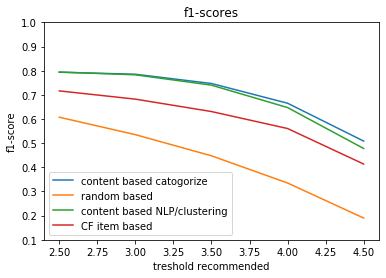

In [543]:
# het maken van een plotje van verschillende f1 waardes bij verschillende waardes van de parameter treshold
# beide waardes moeten zoveel mogelijk bij de 1,0 liggen
# precision, hoevaak is een aanbevolen business ook terecht aanbevolen
# recall, van welke businesses dat je zou willen dat ze worden aangeraden, worden ook daadwerkelijk aangeraden

content_NLP_clustering = pd.read_pickle('./data/content.pkl')
CF_itembased = pd.read_pickle('./data/predicted_item_based.pkl')
CF_userbased = pd.read_pickle

treshold_used = 4
treshold_recommended = [2.5, 3.0, 3.5, 4.0, 4.5]

def recommended(predictions, treshold):
    recommended = predictions[predictions['predicted rating'] >= treshold]
    return recommended   

def hidden(predictions, treshold):
    hidden = predictions[predictions['predicted rating'] < treshold]
    return hidden 

def used(predictions, treshold):
    used = predictions[predictions['stars'] >= treshold]
    return used
    
def unused(predictions, treshold):
    unused = predictions[predictions['stars'] < treshold]
    return unused

def confusion(recommended, hidden, used, unused):
    
    TP = len((used.index).intersection(recommended.index))
    FP = len((recommended.index).intersection(unused.index))
    TN = len((hidden.index).intersection(unused.index))
    FN = len((hidden.index).intersection(used.index))
    
    data = {'used':  [TP, FN],
        'unused': [FP, TN]}

    confusion = pd.DataFrame (data, columns = ['used','unused'], index = ['recommended', 'hidden'])
    return confusion

def recall(confusion_matrix):
    noemer = confusion_matrix.iloc[0, 0] + confusion_matrix.iloc[1, 0] 
    teller = confusion_matrix.iloc[0, 0]
    return teller/noemer
    
def precision(confusion_matrix):
    noemer = confusion_matrix.iloc[0, 0] + confusion_matrix.iloc[0,1] 
    teller = confusion_matrix.iloc[0, 0]
    return teller/noemer 

# content_based manier catogorize
f1_1 = []
for tres in treshold_recommended:
    recommended_items = recommended(predicted, tres)
    hidden_items = hidden(predicted, tres)
    used_items = used(predicted, treshold_used)
    unused_items = unused(predicted, treshold_used)
    confusion_matrix = confusion(recommended_items, hidden_items, used_items, unused_items)
    precision_content_based1 = precision(confusion_matrix)
    recall_content_based1 = recall(confusion_matrix)
    f1_score = 2*((precision_content_based1*recall_content_based1)/(precision_content_based1+recall_content_based1))
    f1_1.append(f1_score)

plt.plot(treshold_recommended, f1_1)
 
# random based
f1_2 = []
for tres in treshold_recommended:
    recommended_items = recommended(random_matrix, tres)
    hidden_items = hidden(random_matrix, tres)
    used_items = used(random_matrix, treshold_used)
    unused_items = unused(random_matrix, treshold_used)
    confusion_matrix = confusion(recommended_items, hidden_items, used_items, unused_items)
    precision_random = precision(confusion_matrix)
    recall_random = recall(confusion_matrix)
    f1_score = 2*((precision_random*recall_random)/(precision_random+recall_random))
    f1_2.append(f1_score)

plt.plot(treshold_recommended, f1_2)

# content based NLP/clustering
f1_3 = []
for tres in treshold_recommended:
    recommended_items = recommended(content_NLP_clustering, tres)
    hidden_items = hidden(content_NLP_clustering, tres)
    used_items = used(content_NLP_clustering, treshold_used)
    unused_items = unused(content_NLP_clustering, treshold_used)
    confusion_matrix = confusion(recommended_items, hidden_items, used_items, unused_items)
    precision_content2 = precision(confusion_matrix)
    recall_content2 = recall(confusion_matrix)
    f1_score = 2*((precision_content2*recall_content2)/(precision_content2+recall_content2))
    f1_3.append(f1_score)

plt.plot(treshold_recommended, f1_3)

# CF item based
f1_4 = []
for tres in treshold_recommended:
    recommended_items = recommended(CF_itembased, tres)
    hidden_items = hidden(CF_itembased, tres)
    used_items = used(CF_itembased, treshold_used)
    unused_items = unused(CF_itembased, treshold_used)
    confusion_matrix = confusion(recommended_items, hidden_items, used_items, unused_items)
    precision_CFitem = precision(confusion_matrix)
    recall_CFitem = recall(confusion_matrix)
    f1_score = 2*((precision_CFitem*recall_CFitem)/(precision_CFitem+recall_CFitem))
    f1_4.append(f1_score)

plt.plot(treshold_recommended, f1_4)

plt.xlim(2.4 , 4.6)
plt.ylim(0.1, 1.0)
plt.title('f1-scores')
plt.xlabel('treshold recommended')
plt.ylabel('f1-score')

plt.legend(['content based catogorize', 'random based', 'content based NLP/clustering', 'CF item based'], loc = 'lower left')

(0.0, 5.0)

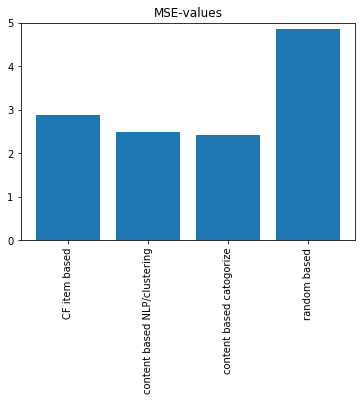

In [526]:
#plotje voor verschillende MSE maken van alle algoritmes

MSE = [2.871 ,2.477 ,2.4175 , 4.85]

plt.bar(['CF item based', 'content based NLP/clustering', 'content based catogorize', 'random based'], MSE)
plt.xticks(rotation = 90)
plt.title('MSE-values')
plt.ylim(0.0, 5.0)